In [1]:
import gym
import numpy as np

import time

ModuleNotFoundError: No module named 'gym'

In [2]:
import sys
import os

sys.path.append(os.path.abspath('../'))

del sys, os

In [3]:
import matplotlib.pyplot as plt

In [4]:
# LaTeX rendering in graphs
from distutils.spawn import find_executable
if find_executable('latex'):
    plt.rc('text', usetex=True)

plt.rc('font', family='serif')

# High resolution graphs
%config InlineBackend.figure_format = 'retina'

In [5]:
import torch

In [6]:
%reload_ext autoreload
%autoreload 2

In [7]:
import models.rnn as rnns
import models.mlp as mlps
import control.agents as agents
import control.environments as env

In [8]:
from utils.notifications import Slack

In [9]:
import copy

# Setup

In [10]:
model = mlps.MLP(input_dimension=15, n_hidden_layers=0, hidden_dimension=20, n_actions=3)
# model = rnns.AttentiveRNN(input_dimension=128, hidden_dimension=50, truncate=10)  #, key_dimension=15)

In [90]:
optimiser = torch.optim.Adam(model.parameters(), lr=.1)

In [99]:
agent = agents.DQNAgent(model, optimiser, gamma=.9999, temperature=10, algorithm='expsarsa', n_actions=3)

In [98]:
environment = env.OverSimplifiedEnvironment(
    environment=gym.make('Breakout-ram-v0'), 
    agent=agent,
    verbose=True,
    max_steps=200,
    # slack=Slack(),
    capacity=5000
)

# Experiment

In [93]:
agent.commit()

In [94]:
environment.exploration_episode()

(0.0, 32)

100%|###############################################################| 10/10 [03:03<00:00, 19.42s/it]


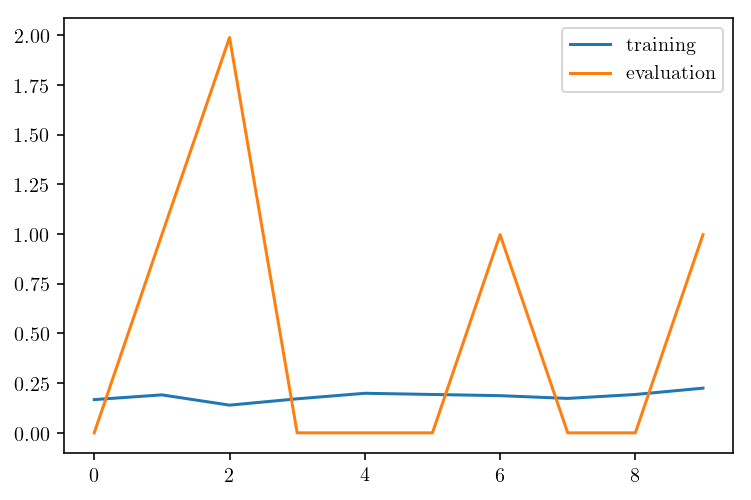

100%|###############################################################| 10/10 [03:21<00:00, 20.26s/it]


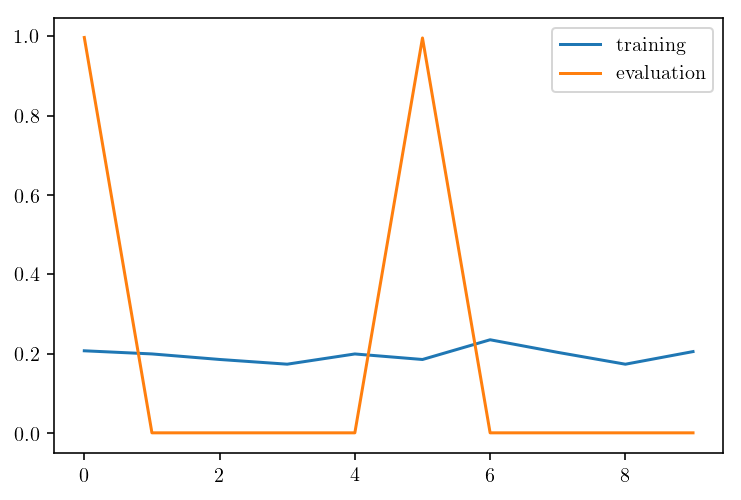

100%|###############################################################| 10/10 [03:17<00:00, 19.61s/it]


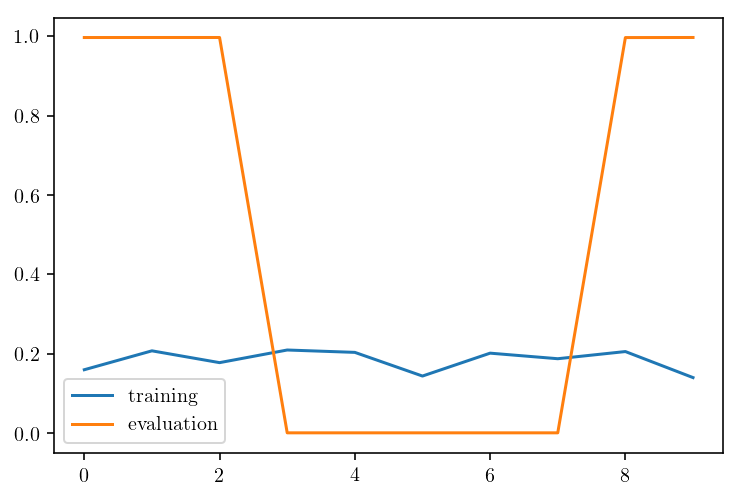

100%|###############################################################| 10/10 [03:19<00:00, 20.05s/it]


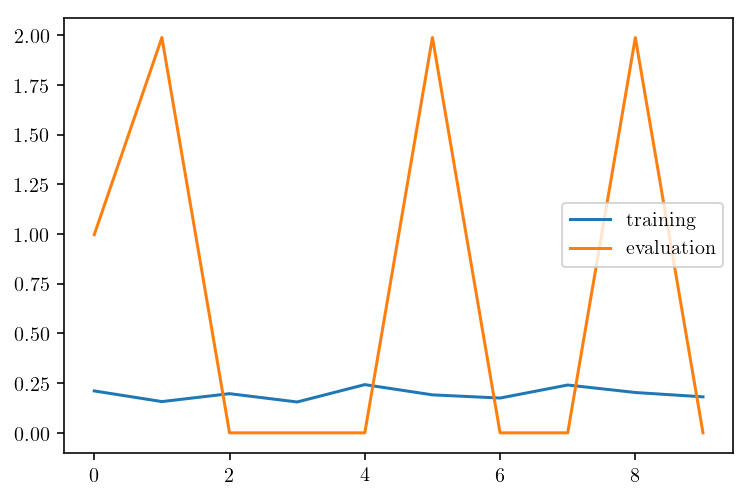

100%|###############################################################| 10/10 [03:18<00:00, 19.85s/it]


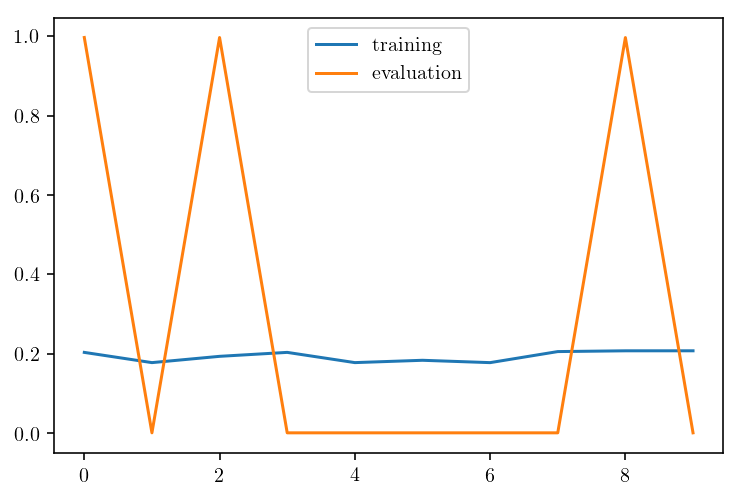

In [87]:
for _ in range(5):
    
    returns = environment.train(segments=10, episodes=500)

    plt.figure()
    plt.plot(returns.T[0], label='training')
    plt.plot(returns.T[1], label='evaluation')
    plt.legend()
    plt.show()
    
    agent.temperature *= .8

100%|###############################################################| 10/10 [03:20<00:00, 20.13s/it]


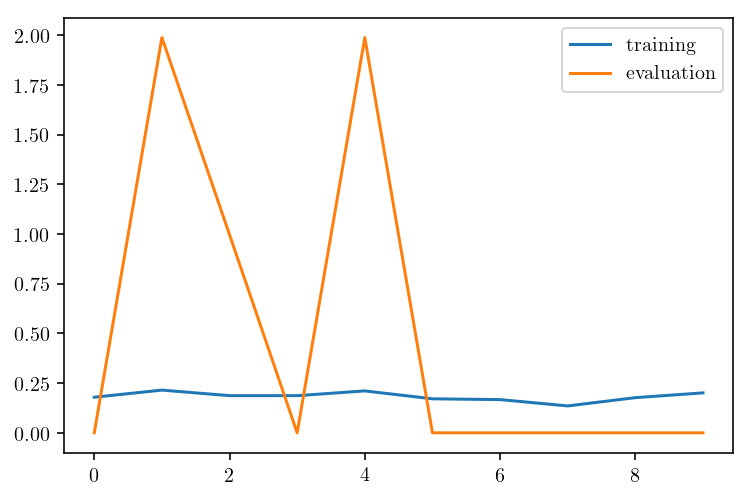

100%|###############################################################| 10/10 [03:20<00:00, 19.99s/it]


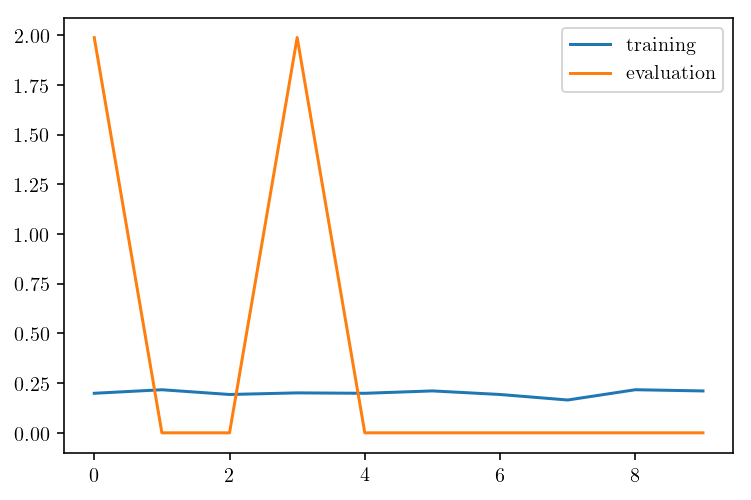

100%|###############################################################| 10/10 [03:22<00:00, 20.09s/it]


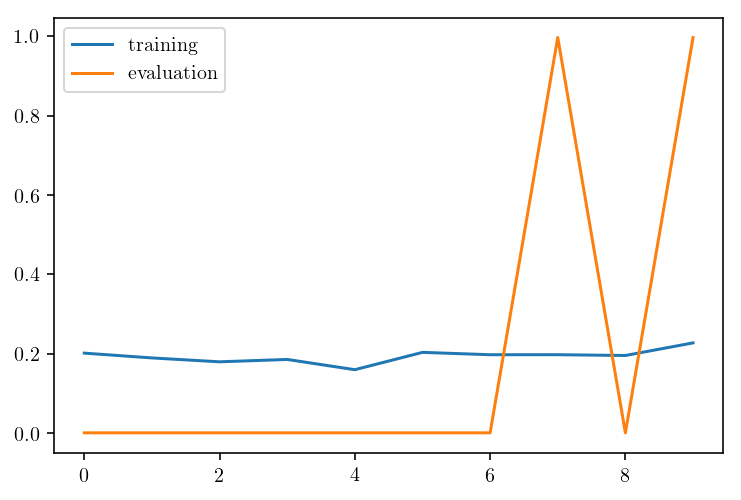

100%|###############################################################| 10/10 [03:22<00:00, 20.22s/it]


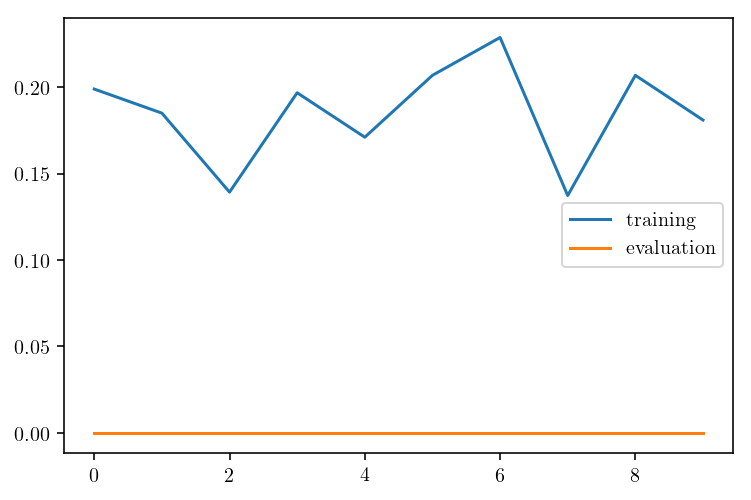

100%|###############################################################| 10/10 [03:18<00:00, 19.94s/it]


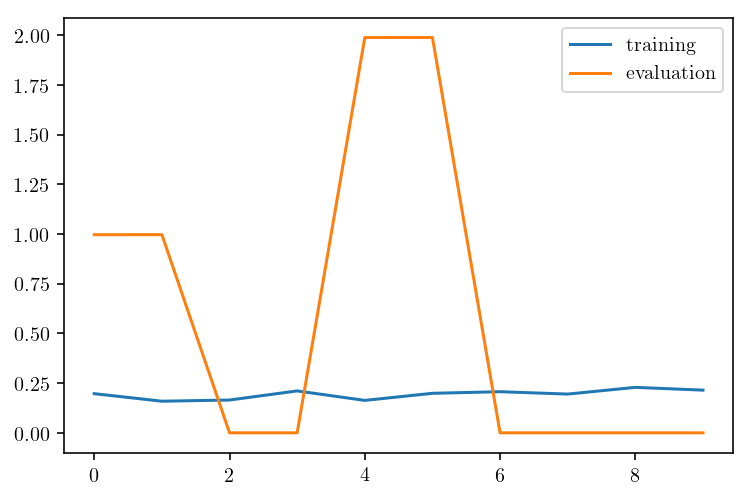

In [89]:
for _ in range(5):
    
    returns = environment.train(segments=10, episodes=500)

    plt.figure()
    plt.plot(returns.T[0], label='training')
    plt.plot(returns.T[1], label='evaluation')
    plt.legend()
    plt.show()
    
    agent.temperature *= .8

100%|###############################################################| 10/10 [03:06<00:00, 19.35s/it]


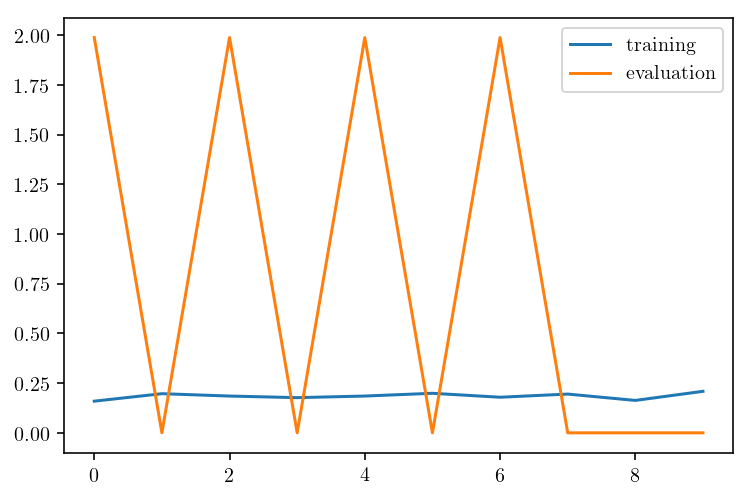

100%|###############################################################| 10/10 [03:18<00:00, 20.05s/it]


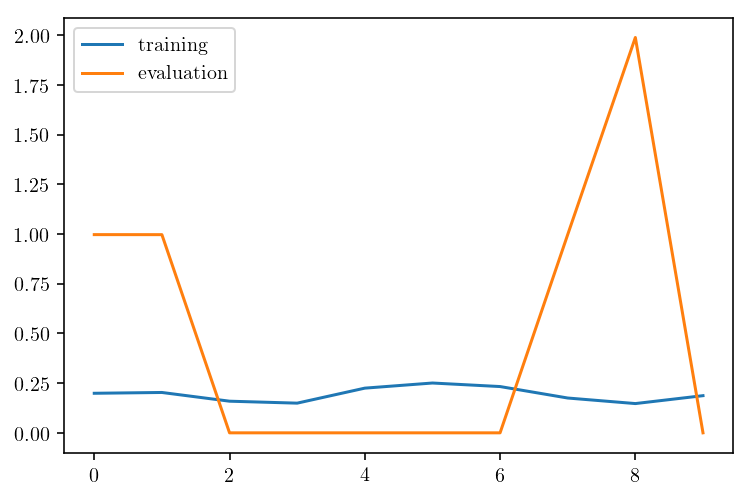

100%|###############################################################| 10/10 [03:18<00:00, 19.86s/it]


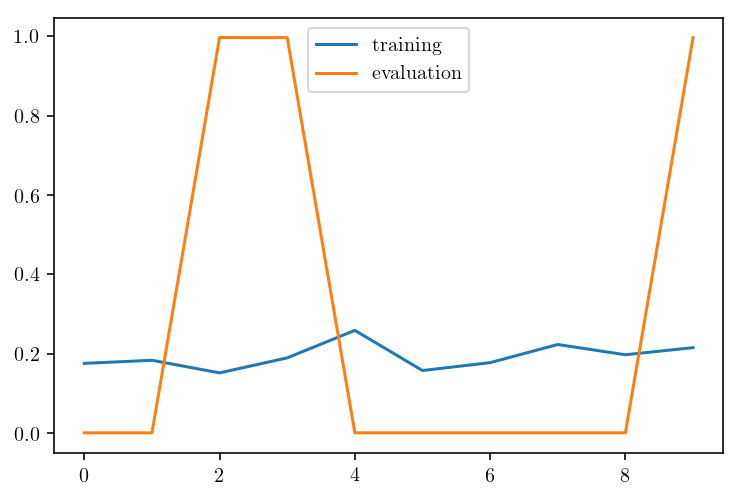

100%|###############################################################| 10/10 [03:16<00:00, 20.02s/it]


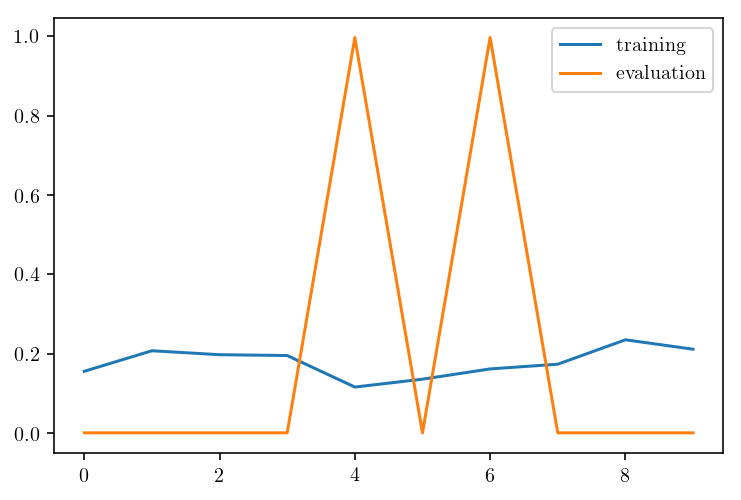

 20%|############8                                                   | 2/10 [00:38<02:32, 19.03s/it]


KeyboardInterrupt: 

In [100]:
for _ in range(5):
    
    returns = environment.train(segments=10, episodes=500)

    plt.figure()
    plt.plot(returns.T[0], label='training')
    plt.plot(returns.T[1], label='evaluation')
    plt.legend()
    plt.show()
    
    agent.temperature *= .9

In [211]:
environment.environment.render()
environment.reset()

In [225]:
environment.environment.render()
environment.environment.step(2)

(array([ 63,  63,  63,  63,  63,  63, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 192, 192, 192, 192, 192, 192, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 240,   0,   0,
        255,   0,   0, 240,   0,   5,   0,   0,   6,   0,  70, 182, 134,
        198,  22,  38,  54,  70,   0,   6, 191,   0,   4,  13,   0,   0,
          0,   0,   0, 241,   0, 242,   0, 242,  25, 241,   5, 242,  44,
          0, 255,   0,   0,  64,   0,   0,   0,  84,   0, 156,   0,   1,
          0,   1,   0,   0,   8,   0, 255, 255, 255, 255, 255, 255, 255,
          0,   0, 255,   0,   0, 186, 214, 117, 246, 219, 242], dtype=uint8),
 0.0,
 False,
 {'ale.lives': 5})

In [242]:
environment.environment.render()
environment.evaluation_episode()

(0.0, 200)

In [ ]:
environment.evaluation_episode(render=True)

In [88]:
agent.temperature

4.194304000000002

In [83]:
environment.exploration_segment(20)

(25.959265773117163, 8.996400839874012)

In [79]:
environment.batch(100)

In [37]:
environment.reset()
s = environment.state

In [38]:
agent.q(s)

array([-0.06783922, -0.04041   , -0.04206257, -0.1287726 ], dtype=float32)

In [123]:
agent.commit()

In [124]:
agent.q(x)

array([-0.7905634 , -0.24595691, -0.15114474, -0.5289955 ], dtype=float32)

In [31]:
environment.evaluation_episode()

(0.0, 1000)

In [1750]:
state = environment.environment.reset()

agent.eval()

done = False
full_return = 0.

action = np.random.choice(environment.greedy(state))

counter = 0
while not done and counter < 10000:
    
    s, reward, done, i = environment.environment.step(action)

    # If there are ties, we might want to choose between actions at random
    a = np.random.choice(environment.greedy(s))

    # We store the new state and action
    state, action = s, a
    
    full_return = agent.gamma * full_return + reward
    counter += 1

full_return, counter

(0.0, 160)

In [158]:
state = environment.environment.reset()
action = np.random.choice(environment.greedy(state))

RuntimeError: size mismatch, m1: [1 x 128], m2: [15 x 20] at /Users/soumith/mc3build/conda-bld/pytorch_1549597882250/work/aten/src/TH/generic/THTensorMath.cpp:940

In [1784]:
s, reward, done, i = environment.environment.step(action)

# If there are ties, we might want to choose between actions at random
# a = np.random.choice(4, p=environment.epsilon_greedy(s, .1))
a = environment.environment.action_space.sample()

# We store the new state and action
state, action = s, a

done = done or i['ale.lives'] < 5

done, i, a

(True, {'ale.lives': 4}, 0)

# Training

In [1752]:
environment.run(epochs=2, segments=5, episodes=50)

100%|#################################################################| 5/5 [00:45<00:00,  9.41s/it]


In [23]:
environment.save('../saved/')